<a href="https://colab.research.google.com/github/abnd-me/Public/blob/main/Abhinandpp_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Dataset

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/credit.csv')

In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [6]:
df.shape

(100000, 28)

In [7]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
numerical_features = ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']

###outlier detection

In [9]:
from scipy.stats import zscore

z_scores = zscore(df[numerical_features])

z_scores.head()


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-1.527525,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,-0.464928,-0.533485,-1.067562,0.439200,-0.439448,-0.862311,-0.397733
1,-1.091089,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.493173,0.120990,-0.464928,-0.533485,-0.066489,0.449232,-0.439448,-0.862311,-0.535916
2,-0.654654,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,-0.464928,-0.533485,-0.718376,0.459264,-0.439448,-0.862311,-0.304920
3,-0.218218,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.086253,-1.493173,-0.635503,-0.464928,-0.533485,-0.177318,0.469296,-0.439448,-0.862311,-0.839300
4,0.218218,-0.958344,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.018705,-1.493173,0.120990,-0.464928,-0.533485,-1.463366,0.479328,-0.439448,-0.862311,-0.253945


In [10]:
print("Maximum value in z-score:", z_scores.max())
print("Minimum value in z-score:", z_scores.min())

Maximum value in z-score: Month                        1.527525
Age                          2.107215
Annual_Income                3.380803
Monthly_Inhand_Salary        3.454464
Num_Bank_Accounts            2.171433
Num_Credit_Card              2.644508
Interest_Rate                2.227123
Num_of_Loan                  2.234812
Delay_from_due_date          2.763932
Num_of_Delayed_Payment       1.873758
Changed_Credit_Limit         2.951786
Num_Credit_Inquiries         2.896151
Outstanding_Debt             3.092181
Credit_Utilization_Ratio     3.462058
Credit_History_Age           1.833659
Total_EMI_per_month         12.636649
Amount_invested_monthly      9.718572
Monthly_Balance              3.923761
dtype: float64
Minimum value in z-score: Month                      -1.527525
Age                        -1.794405
Annual_Income              -1.135772
Monthly_Inhand_Salary      -1.221945
Num_Bank_Accounts          -2.070265
Num_Credit_Card            -2.676988
Interest_Rate              

In [11]:

z_score_threshold = 3

# Identify outliers
outliers = (abs(z_scores) > z_score_threshold).any(axis=1)

# Display outliers
print("Outliers identified using Z-score:")
print(df[outliers])



Outliers identified using Z-score:
           ID  Customer_ID  Month    Name   Age          SSN  Occupation  \
16       5658        11708      1  Langep  34.0  486853974.0    Engineer   
17       5659        11708      2  Langep  34.0  486853974.0    Engineer   
50       5708        10314      3  Nadiaq  34.0  411510676.0      Lawyer   
51       5709        10314      4  Nadiaq  34.0  411510676.0      Lawyer   
52       5710        10314      5  Nadiaq  34.0  411510676.0      Lawyer   
...       ...          ...    ...     ...   ...          ...         ...   
99628  155074        29579      5   Leahh  25.0  769441950.0  Accountant   
99629  155075        29579      6   Leahh  25.0  769441950.0  Accountant   
99630  155076        29579      7   Leahh  25.0  769441950.0  Accountant   
99631  155077        29579      8   Leahh  25.0  769441950.0  Accountant   
99671  155137         2825      8  Lianau  31.0  228474867.0      Lawyer   

       Annual_Income  Monthly_Inhand_Salary  Num_Ban

In [12]:
from scipy.stats.mstats import winsorize


winsorize_percentage = 0.02

for feature in numerical_features:
    df[feature] = winsorize(df[feature], limits=winsorize_percentage)

#summary statistics after winsorization
print(df.describe())


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.306780   
std     43301.486619   14340.543051       2.291299      10.700974   
min      5634.000000    1006.000000       1.000000      15.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      54.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50197.552434            4172.560059           5.368730   
std    2.908267e+08   37356.828302            3105.963840           2.593136   
min    8.134900e+04    8135.920000             620.509583 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [13]:
df[feature]

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64

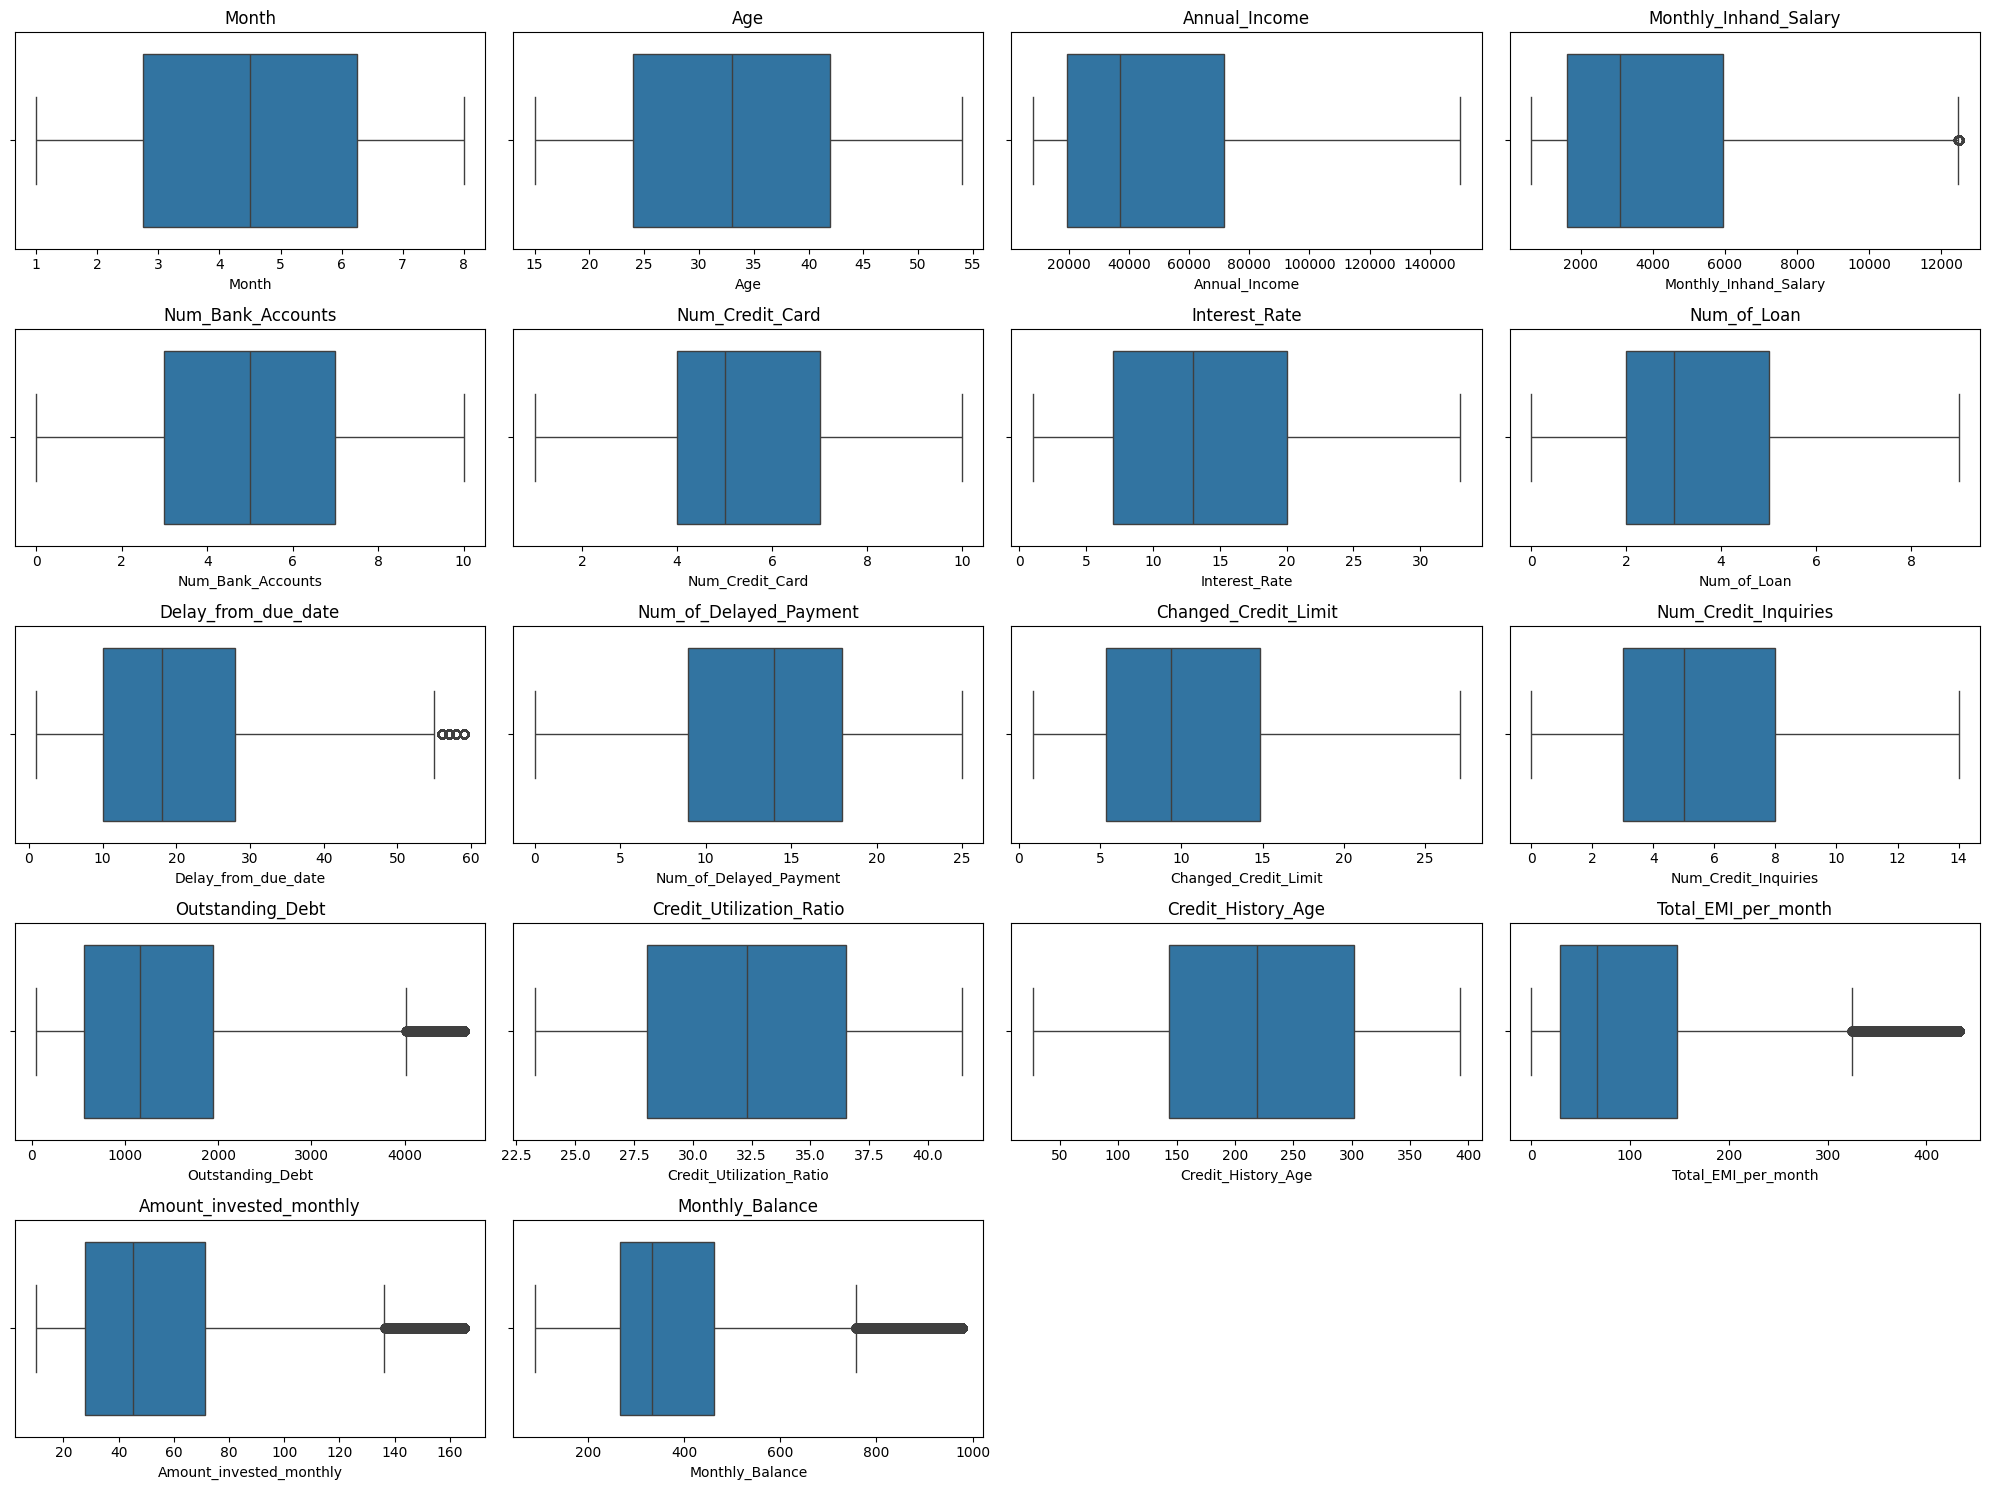

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#boxplot after capping outliers
plt.figure(figsize=(20, 15))
num_cols = 4
num_rows = (len(numerical_features) - 1) // num_cols + 1
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

##EDA

In [15]:
print(df.describe())

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.306780   
std     43301.486619   14340.543051       2.291299      10.700974   
min      5634.000000    1006.000000       1.000000      15.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      54.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50197.552434            4172.560059           5.368730   
std    2.908267e+08   37356.828302            3105.963840           2.593136   
min    8.134900e+04    8135.920000             620.509583 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [16]:
df1 = df

credit_mix_new = {'Good': 3, 'Standard': 2, 'Bad': 1}
credit_score_new = {'Good': 3, 'Standard': 2, 'Poor': 1}

df1['Credit_Mix_Value'] = df1['Credit_Mix'].map(credit_mix_new)
df1['Credit_Score_Value'] = df1['Credit_Score'].map(credit_score_new)

In [17]:
numerical_features = ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance','Credit_Mix_Value','Credit_Score_Value']

In [18]:
df1[numerical_features].corr()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Value,Credit_Score_Value
Month,1.000000e+00,0.016383,1.374185e-17,-0.001759,0.000046,0.000062,9.390735e-18,1.555542e-16,0.000342,0.000115,-0.000676,0.137421,3.163107e-17,0.002515,0.022024,0.038025,-4.284853e-17,-0.002040,1.130265e-17,0.016291
Age,1.638329e-02,1.000000,9.187755e-02,0.090896,-0.189821,-0.148196,-2.171464e-01,-2.128176e-01,-0.174031,-0.183783,-0.157795,-0.251806,-2.029135e-01,0.024800,0.234113,-0.068923,6.843005e-02,0.116835,2.422293e-01,0.159777
Annual_Income,1.374185e-17,0.091878,1.000000e+00,0.998157,-0.282464,-0.218088,-3.022138e-01,-2.564060e-01,-0.249794,-0.283580,-0.175367,-0.282145,-2.714894e-01,0.165468,0.272979,0.489026,8.221834e-01,0.636614,3.397032e-01,0.212528
Monthly_Inhand_Salary,-1.759305e-03,0.090896,9.981571e-01,1.000000,-0.281386,-0.216969,-3.015488e-01,-2.548823e-01,-0.249047,-0.282566,-0.174982,-0.281420,-2.710564e-01,0.165611,0.271944,0.480171,8.229754e-01,0.638018,3.382317e-01,0.209609
Num_Bank_Accounts,4.628389e-05,-0.189821,-2.824640e-01,-0.281386,1.000000,0.442667,5.849620e-01,4.724852e-01,0.561063,0.601865,0.333707,0.520897,5.086359e-01,-0.068301,-0.485359,0.083222,-2.292744e-01,-0.289035,-7.236857e-01,-0.388163
Num_Credit_Card,6.232135e-05,-0.148196,-2.180884e-01,-0.216969,0.442667,1.000000,4.986231e-01,4.180408e-01,0.480471,0.423367,0.254256,0.460768,4.920248e-01,-0.052818,-0.417351,0.089839,-1.782651e-01,-0.234458,-5.450197e-01,-0.404452
Interest_Rate,9.390735e-18,-0.217146,-3.022138e-01,-0.301549,0.584962,0.498623,1.000000e+00,5.594980e-01,0.590330,0.572204,0.370034,0.635932,6.318677e-01,-0.072348,-0.577122,0.114557,-2.473150e-01,-0.321730,-7.541099e-01,-0.485816
Num_of_Loan,1.555542e-16,-0.212818,-2.564060e-01,-0.254882,0.472485,0.418041,5.594980e-01,1.000000e+00,0.502353,0.473919,0.373112,0.568381,6.400705e-01,-0.095770,-0.605554,0.438287,-2.166450e-01,-0.432873,-6.375585e-01,-0.358355
Delay_from_due_date,3.423030e-04,-0.174031,-2.497937e-01,-0.249047,0.561063,0.480471,5.903302e-01,5.023531e-01,1.000000,0.542430,0.296376,0.542768,5.746622e-01,-0.061128,-0.492282,0.119223,-2.045068e-01,-0.275287,-6.906194e-01,-0.432066
Num_of_Delayed_Payment,1.154567e-04,-0.183783,-2.835801e-01,-0.282566,0.601865,0.423367,5.722036e-01,4.739186e-01,0.542430,1.000000,0.328686,0.502570,5.052602e-01,-0.070285,-0.482048,0.089058,-2.306363e-01,-0.288009,-7.575795e-01,-0.372978


<ipython-input-19-b674d336ded3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


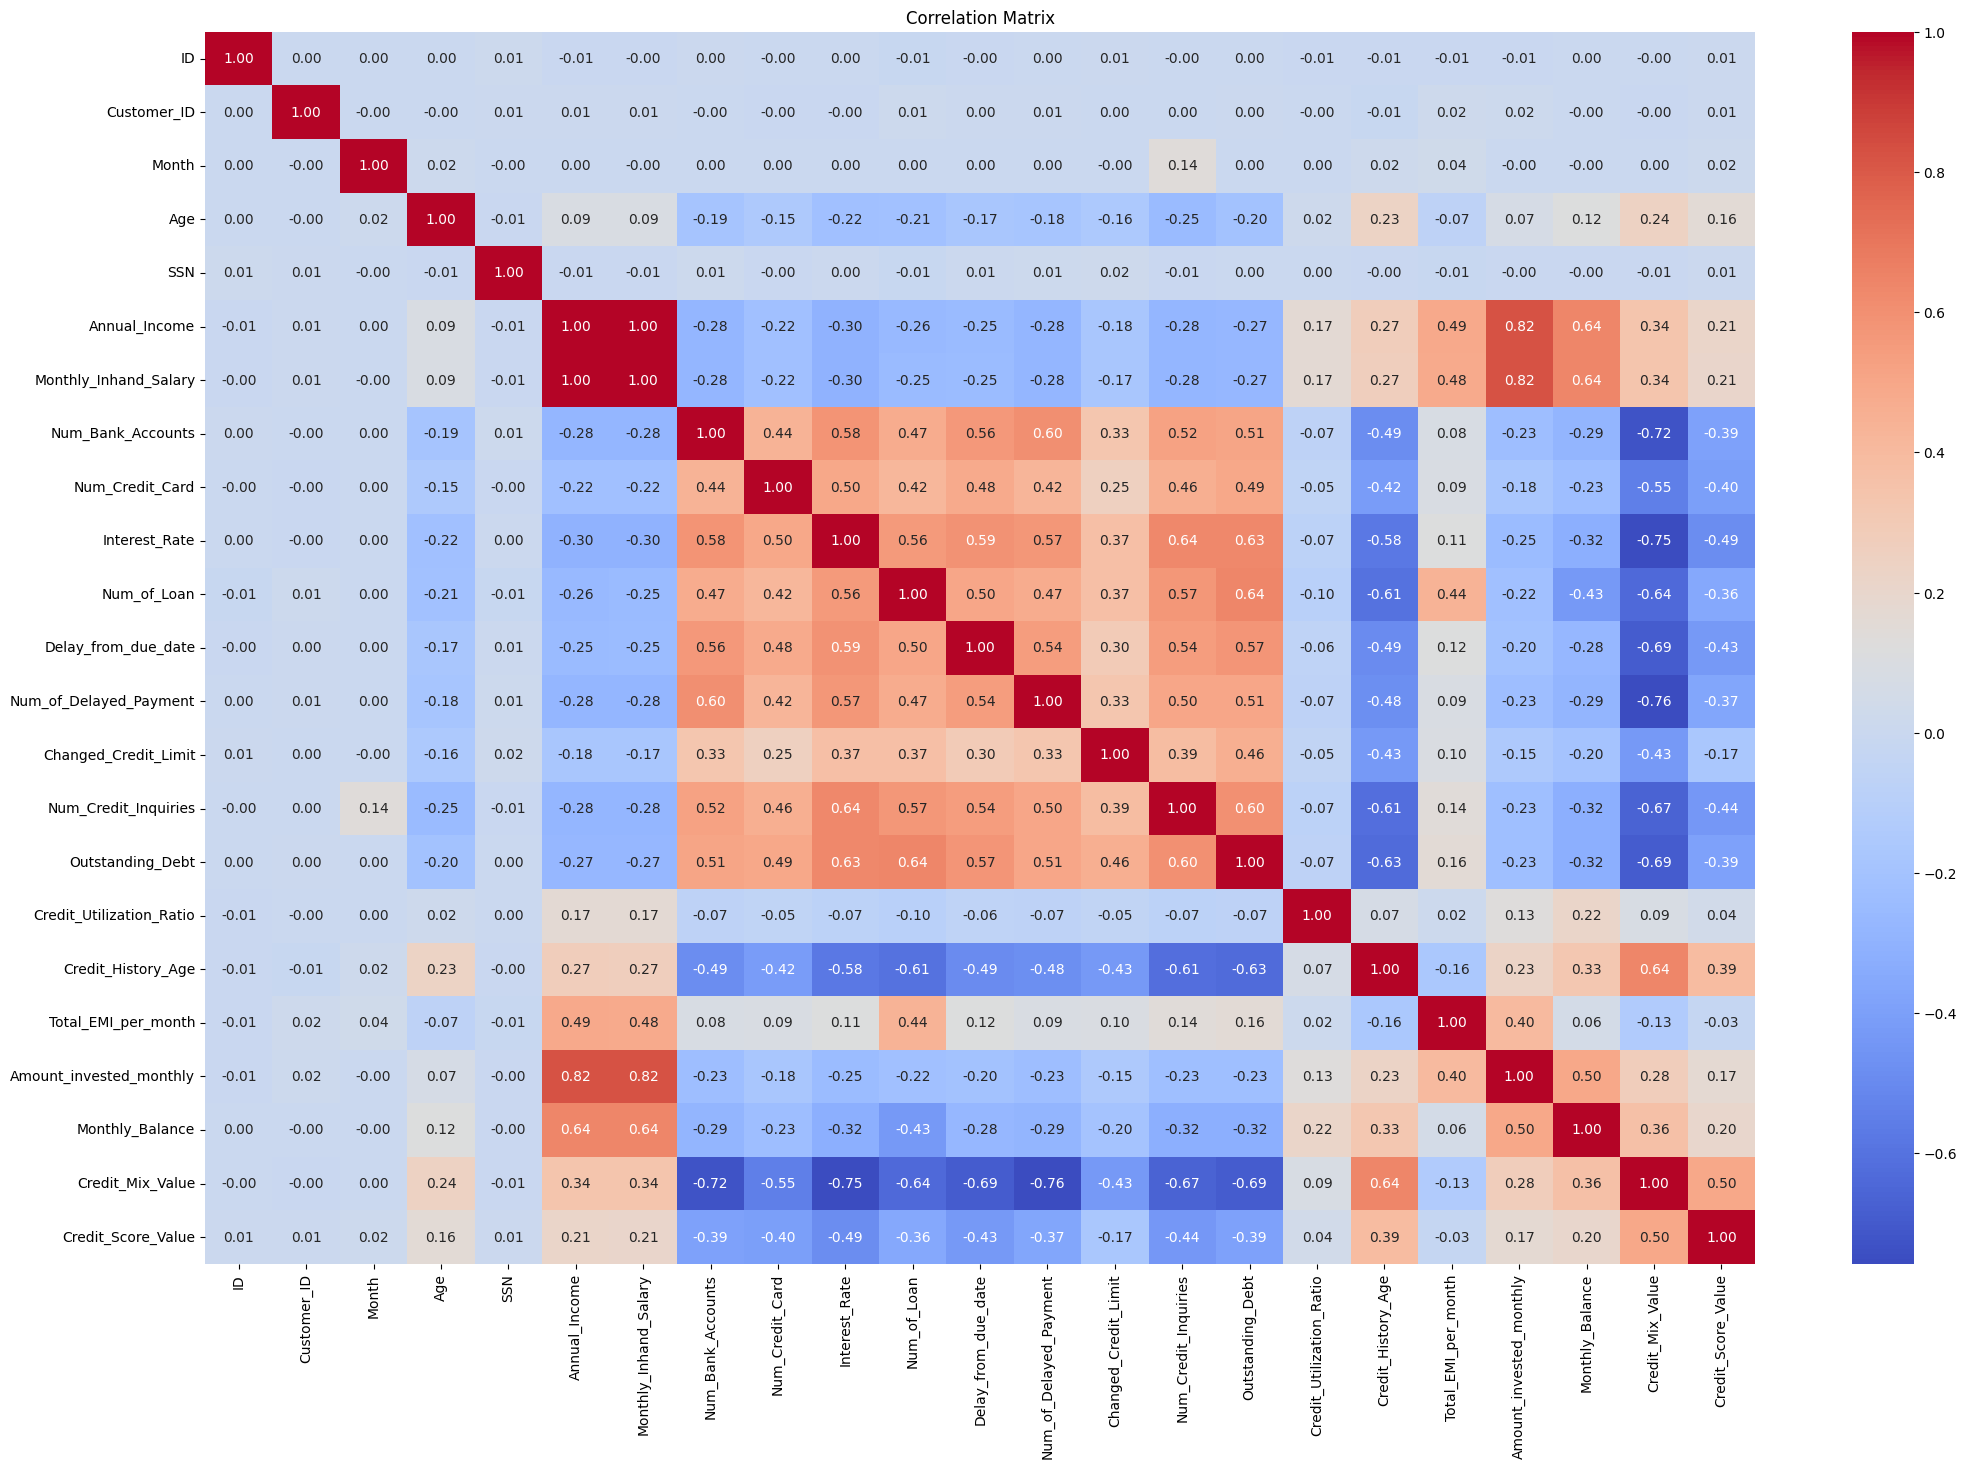

In [19]:
# Correlation matrix heatmap

correlation_matrix = df1.corr()

plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

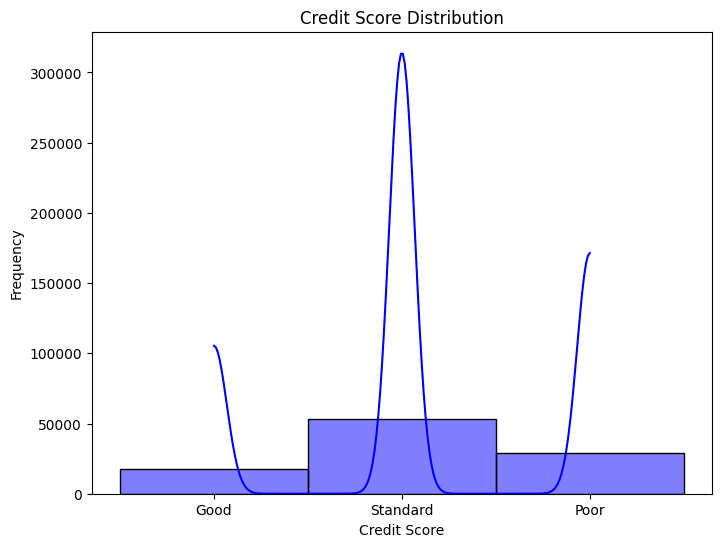

In [20]:
# Credit Score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Credit_Score'], kde=True, color='blue', bins=20)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

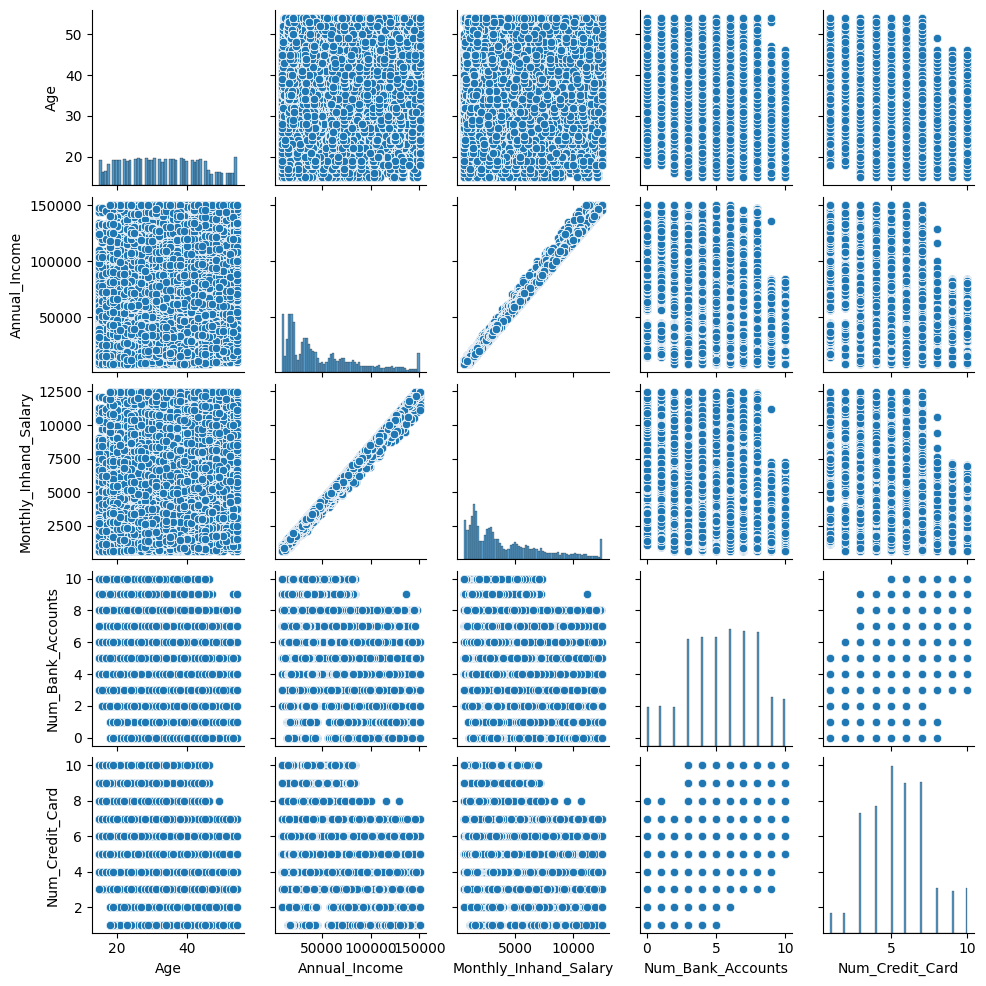

In [21]:
#pair plot
selected_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card']
sns.pairplot(df[selected_features], height = 2)
plt.show()

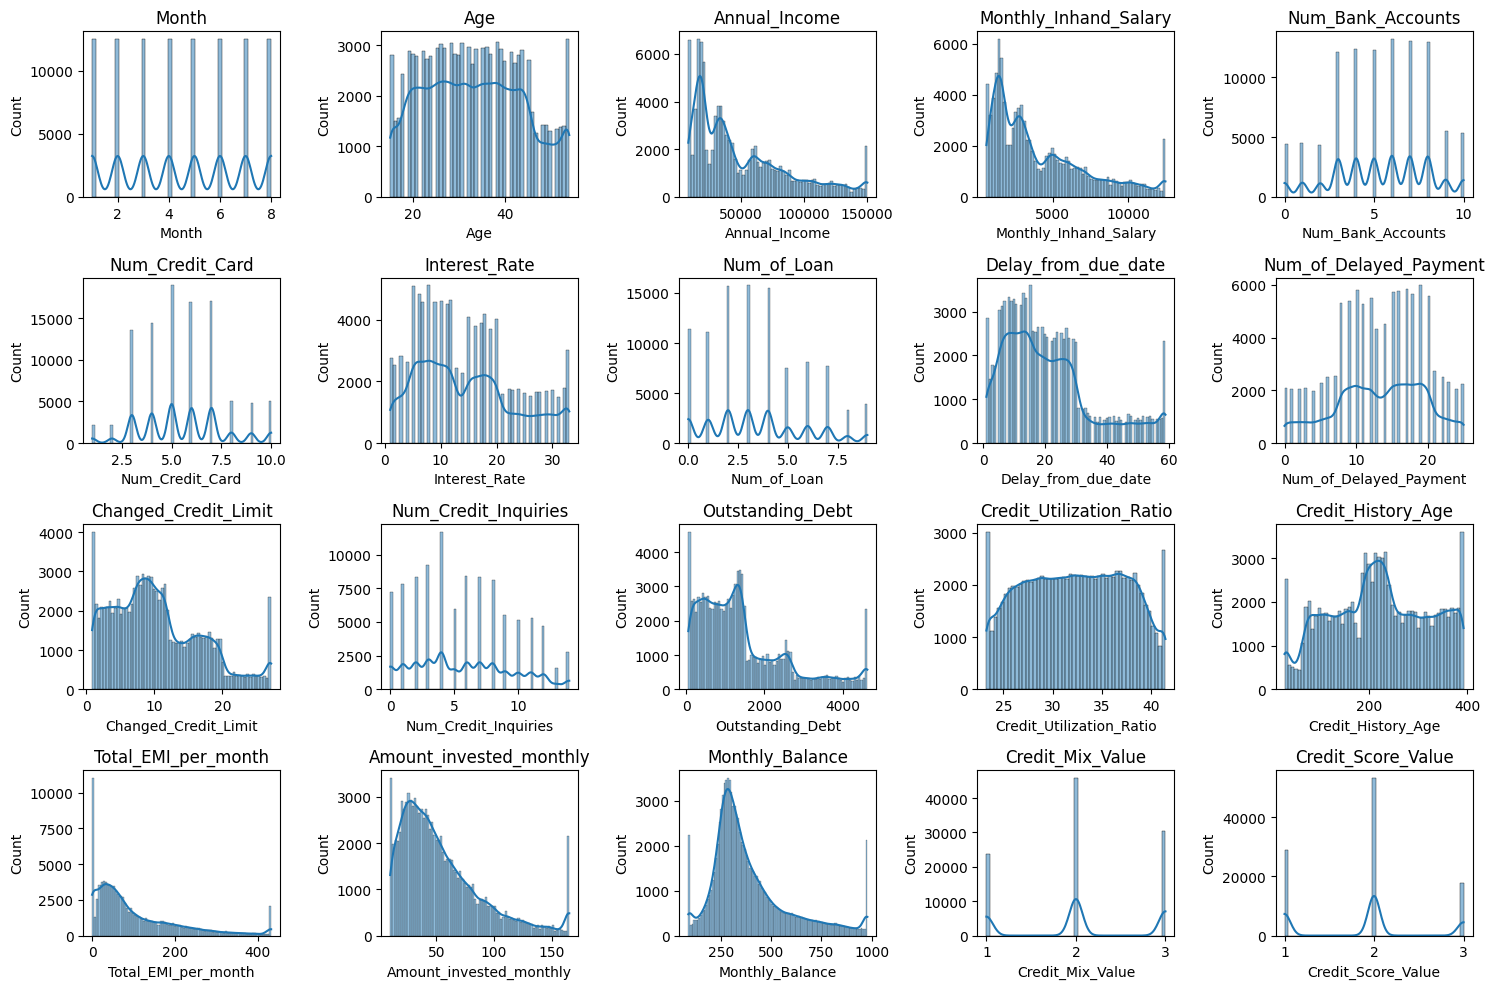

In [22]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

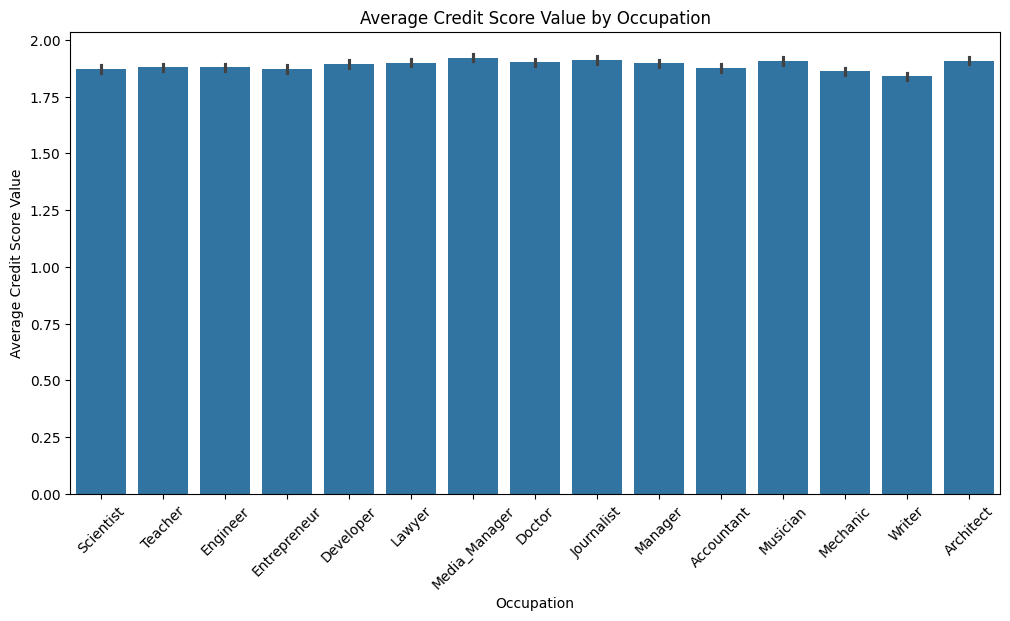

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Credit_Score_Value', data=df1)
plt.title('Average Credit Score Value by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Credit Score Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### we have to extract loan types and assign them to new column for training

In [24]:
# extract individual loan types
def extract_loan_types(loan_str):
    loan_types = [s.strip() for s in loan_str.split(',')]

    flat_loan_types = []
    for loan_type in loan_types:
        if 'and' in loan_type:
            flat_loan_types.extend(loan_type.split('and'))
        else:
            flat_loan_types.append(loan_type)


    return list(set([loan.strip() for loan in flat_loan_types]))

df['Individual_Loan_Types'] = df['Type_of_Loan'].apply(extract_loan_types)

print(df[['Type_of_Loan', 'Individual_Loan_Types']].head())

                                        Type_of_Loan  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...   

                               Individual_Loan_Types  
0  [, Personal Loan, Credit-Builder Loan, Home Eq...  
1  [, Personal Loan, Credit-Builder Loan, Home Eq...  
2  [, Personal Loan, Credit-Builder Loan, Home Eq...  
3  [, Personal Loan, Credit-Builder Loan, Home Eq...  
4  [, Personal Loan, Credit-Builder Loan, Home Eq...  


In [25]:
# Get unique individual loan types
all_loan_types = set()
for loan_types_list in df['Individual_Loan_Types']:
    all_loan_types.update(loan_types_list)

for loan_type in all_loan_types:
    df[loan_type] = df['Individual_Loan_Types'].apply(lambda x: 1 if loan_type in x else 0)

df.drop(columns=['Individual_Loan_Types'], inplace=True)
print(df.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Payday Loan  \
0       19114.12            1824.843333                3.0  ...            0   
1       19114.12            1824.843333                3.0  ...            0   
2       19114.12            1824.843333                3.0  ...            0   
3       19114.12            1824.843333                3.0  ...            0   
4       19114.12            1824.843333                3.0  ...            0   

   Personal Loan  Credit-Builder Loan Not Specified  Debt Cons

In [26]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_Mix_Value', 'Credit_Score_Value', '',
       'Payday Loan', 'Personal Loan', 'Credit-Builder Loan', 'Not Specified',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'No Data', 'Student Loan', 'Auto Loan'],
      dtype='object')

In [27]:
df = df.drop(columns=['No Data',''])

In [28]:
df.drop(columns=['Credit_Mix_Value', 'Credit_Score_Value'], inplace=True)


### Encoding

In [29]:
#do label encoding

from sklearn.preprocessing import LabelEncoder

#categorical variables
categorical_features = [ 'Occupation','Payment_of_Min_Amount',  'Credit_Mix', 'Payment_Behaviour']

#Apply label encoding
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


print(df.head())


     ID  Customer_ID  Month           Name   Age          SSN  Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0          12   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0          12   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0          12   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0          12   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0          12   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Score  \
0       19114.12            1824.843333                3.0  ...          Good   
1       19114.12            1824.843333                3.0  ...          Good   
2       19114.12            1824.843333                3.0  ...          Good   
3       19114.12            1824.843333                3.0  ...          Good   
4       19114.12            1824.843333                3.0  ...          Good   

   Payday Loan  Personal Loan Credit-Builder Loan 

In [31]:
# prompt: download the df

from google.colab import files

df.to_csv('credit_cleaned.csv')
files.download('credit_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Data Split

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', 'Customer_ID', 'Name',  'SSN','Type_of_Loan','Credit_Score'], axis=1)  # Features
y = df['Credit_Score']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


#Model Training

### RandomForestClassifier

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###Evaluate the model


In [61]:
y_pred_rf = rf_classifier.predict(X_val)
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

        Good       0.80      0.79      0.79      2635
        Poor       0.81      0.85      0.83      4438
    Standard       0.85      0.83      0.84      7927

    accuracy                           0.83     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.83      0.83      0.83     15000



In [68]:

#  accuracy score
accuracy_rf = accuracy_score(y_val, y_pred_rf)
accuracy_rf

print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8275333333333333


###LogisticRegression

In [70]:
# model building
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

y_pred_lg = logistic_reg_model.predict(X_val)

# Evaluate model
accuracy_lg = accuracy_score(y_val, y_pred_lg)
print("Logistic Regression Accuracy:", accuracy_lg)

Logistic Regression Accuracy: 0.5472


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:

print(classification_report(y_val, y_pred_lg))

              precision    recall  f1-score   support

        Good       0.41      0.05      0.09      2635
        Poor       0.55      0.34      0.42      4438
    Standard       0.55      0.83      0.66      7927

    accuracy                           0.55     15000
   macro avg       0.50      0.41      0.39     15000
weighted avg       0.53      0.55      0.49     15000



## DecisionTreeClassifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

#predictions
y_pred = decision_tree_model.predict(X_test)

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#  accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

        Good       0.68      0.68      0.68      5322
        Poor       0.74      0.73      0.73      8805
    Standard       0.77      0.77      0.77     15873

    accuracy                           0.74     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.74      0.74      0.74     30000

Accuracy Score: 0.7436666666666667
